# House Price Prediction

## Importing Libraries

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [29]:
# Float formatting for the notebook
pd.options.display.float_format = '{:,.2f}'.format

## Loading the Data

In [30]:
dataset = pd.read_csv('./dataset/boston.csv', index_col=0) # First column is row numbers

### Understanding the Boston House Price Dataset

---------------------------

**Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. PRICE     Median value of owner-occupied homes in $1000's
        
    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/).

## Preliminary Data Exploration 🔎

In [31]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


In [32]:
dataset.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1.00,273.00,21.00,391.99,9.67,22.40
502,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1.00,273.00,21.00,396.90,9.08,20.60
503,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1.00,273.00,21.00,396.90,5.64,23.90
504,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1.00,273.00,21.00,393.45,6.48,22.00
505,0.05,0.00,11.93,0.00,0.57,6.03,80.80,2.50,1.00,273.00,21.00,396.90,7.88,11.90


In [33]:
print(f'The dataset has {dataset.shape[0]} rows and {dataset.shape[1]} columns\n')
print('Column names:', dataset.columns.values)

The dataset has 506 rows and 14 columns

Column names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT' 'PRICE']


In [34]:
# Checking for NaN and null values
print('Number of NaN values:', dataset.isna().values.sum())
print('Number of null values:', dataset.isnull().values.sum())

Number of NaN values: 0
Number of null values: 0


In [35]:
# Checking for duplicates
dataset.duplicated().any()

False

#### Findings: 
- No duplicates
- No null values or NaN values
- The dataset has 506 rows and 14 columns

### Descriptive Statistics

In [36]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [37]:
# Average number of pupils per teacher
print('There is an average of {:.2f} pupils per teacher'.format(dataset.PTRATIO.mean()))

There is an average of 18.46 pupils per teacher


In [38]:
# Average price of a house
print('The average price of a house is ${:.2f}'.format(dataset.PRICE.mean() * 1000))

The average price of a house is $22532.81


In [39]:
# The CHAS feature in the dataset (Charles river)
dataset.CHAS.value_counts()

CHAS
0.00    471
1.00     35
Name: count, dtype: int64

Value is 1 if tract bounds river, and 0 otherwise

In [56]:
# Number of rooms per dwelling
print('The minimum recorded number of rooms is: {}'.format(round(dataset.RM.min()))) 
print('The maximum recorded number of rooms is: {}'.format(round(dataset.RM.max())))
print('The average number of rooms in the dataset: {}'.format(round(dataset.RM.mean())))

The minimum recorded number of rooms is: 4
The maximum recorded number of rooms is: 9
The average number of rooms in the dataset: 6


MIN: 3.56

MAX: 8.78

AVG: 6.26

## Visualizing Features

#### House Prices

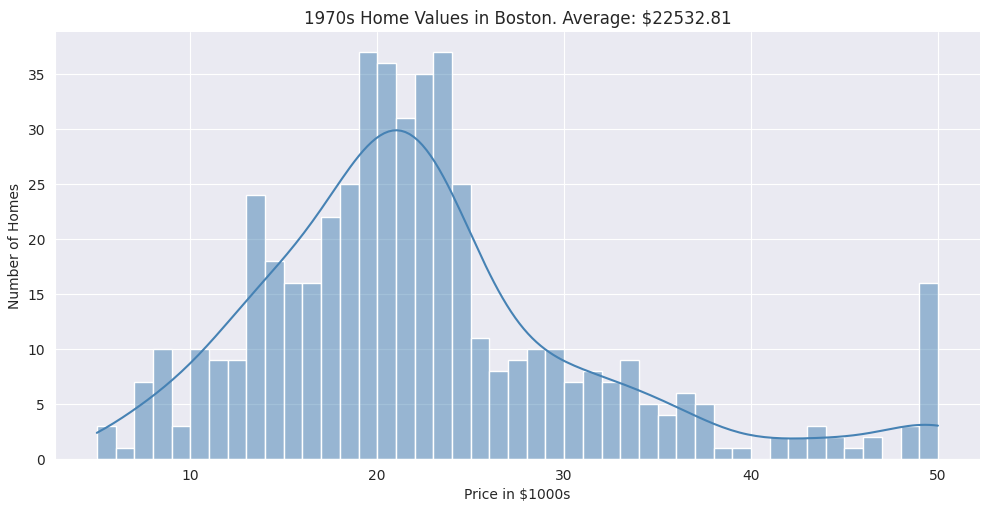

In [92]:
with sns.axes_style('darkgrid'):
        sns.displot(
            data=dataset,
            x='PRICE',
            bins=45,
            kde=True,
            aspect=2,
            color='steelblue',
        )

plt.title(f'1970s Home Values in Boston. Average: ${(1000*dataset.PRICE.mean()):.2f}')
plt.xlabel('Price in $1000s')
plt.ylabel('Number of Homes')

plt.show()

#### Number of Rooms

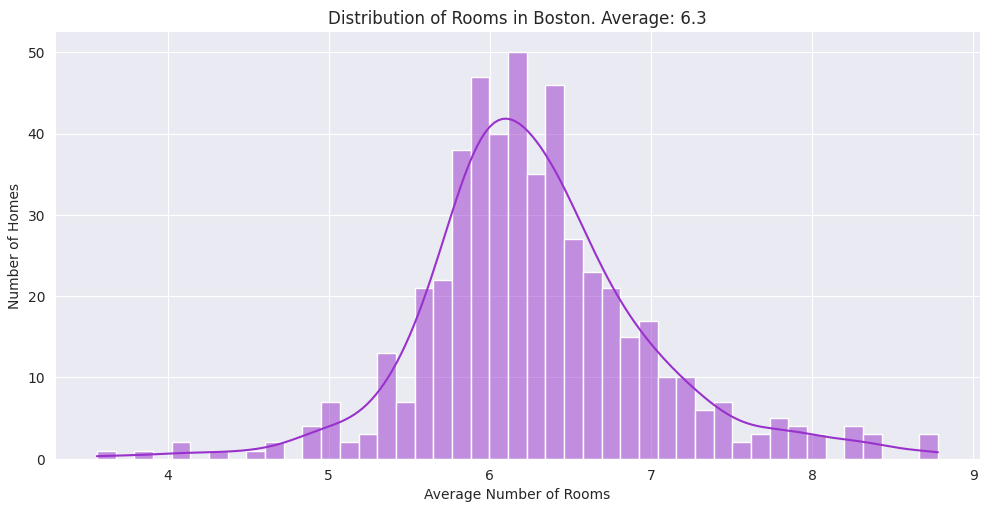

In [90]:
with sns.axes_style('darkgrid'):
        sns.displot(
            data=dataset,
            x='RM',
            bins=45,
            kde=True,
            aspect=2,
            color='darkorchid',
        )

plt.title(f'Distribution of Rooms in Boston. Average: {dataset.RM.mean():.2}')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Number of Homes')

plt.show()

RM - Average number of rooms per dwelling <br>
Average number of rooms per dwelling is the total number of rooms in all dwellings divided by the total

#### Distance to Employment

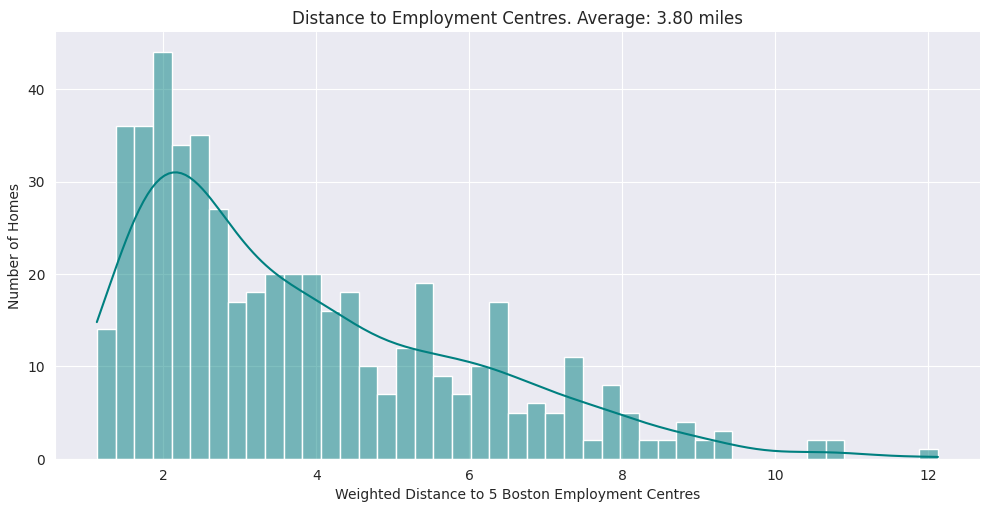

In [91]:
with sns.axes_style('darkgrid'):
        sns.displot(
            data=dataset,
            x='DIS',
            bins=45,
            kde=True,
            aspect=2,
            color='teal',
        )

plt.title(f'Distance to Employment Centres. Average: {(dataset.DIS.mean()):.2f} miles')
plt.xlabel('Weighted Distance to 5 Boston Employment Centres')
plt.ylabel('Number of Homes')

plt.show()

DIS - Weighted distance to the 5 Boston employment centres <br>
Weighted distances are calculated by multiplying the distance between each pair of dwellings by the number of dwell

#### Access to Highways

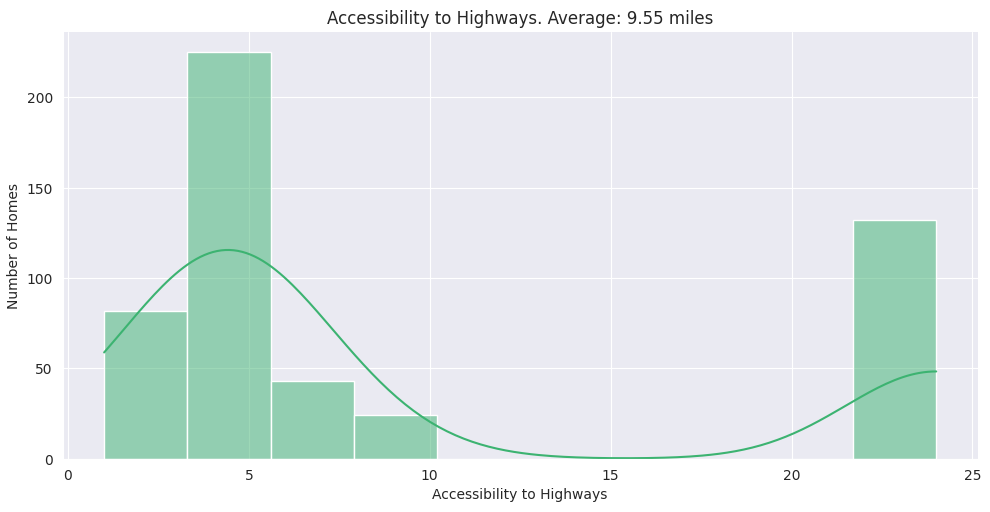

In [95]:
with sns.axes_style('darkgrid'):
        sns.displot(
            data=dataset,
            x='RAD',
            kde=True,
            aspect=2,
            color='mediumseagreen',
        )

plt.title(f'Accessibility to Highways. Average: {(dataset.RAD.mean()):.2f} miles')
plt.xlabel('Accessibility to Highways')
plt.ylabel('Number of Homes')

plt.show()

RAD - Index of accessibility to radial highways <br>
Index of accessibility to radial highways is the sum of the distances from each dwelling to the nearest radial highway

In [112]:
river_df = dataset.CHAS.value_counts()

# Ratio of homes' distance to the river
river_dis = px.bar(
    x=['NO', 'YES'],
    y=river_df.values,
    title='Close to Charles River?',
    color=['NO', 'YES'],
    height=550,
    width=1000
)

river_dis.update_layout(
    xaxis_title='House Close to Charles River?',
    yaxis_title='Number of Houses',
    coloraxis_showscale=False,   
)

river_dis.show()

## Understanding Relationships in the Data

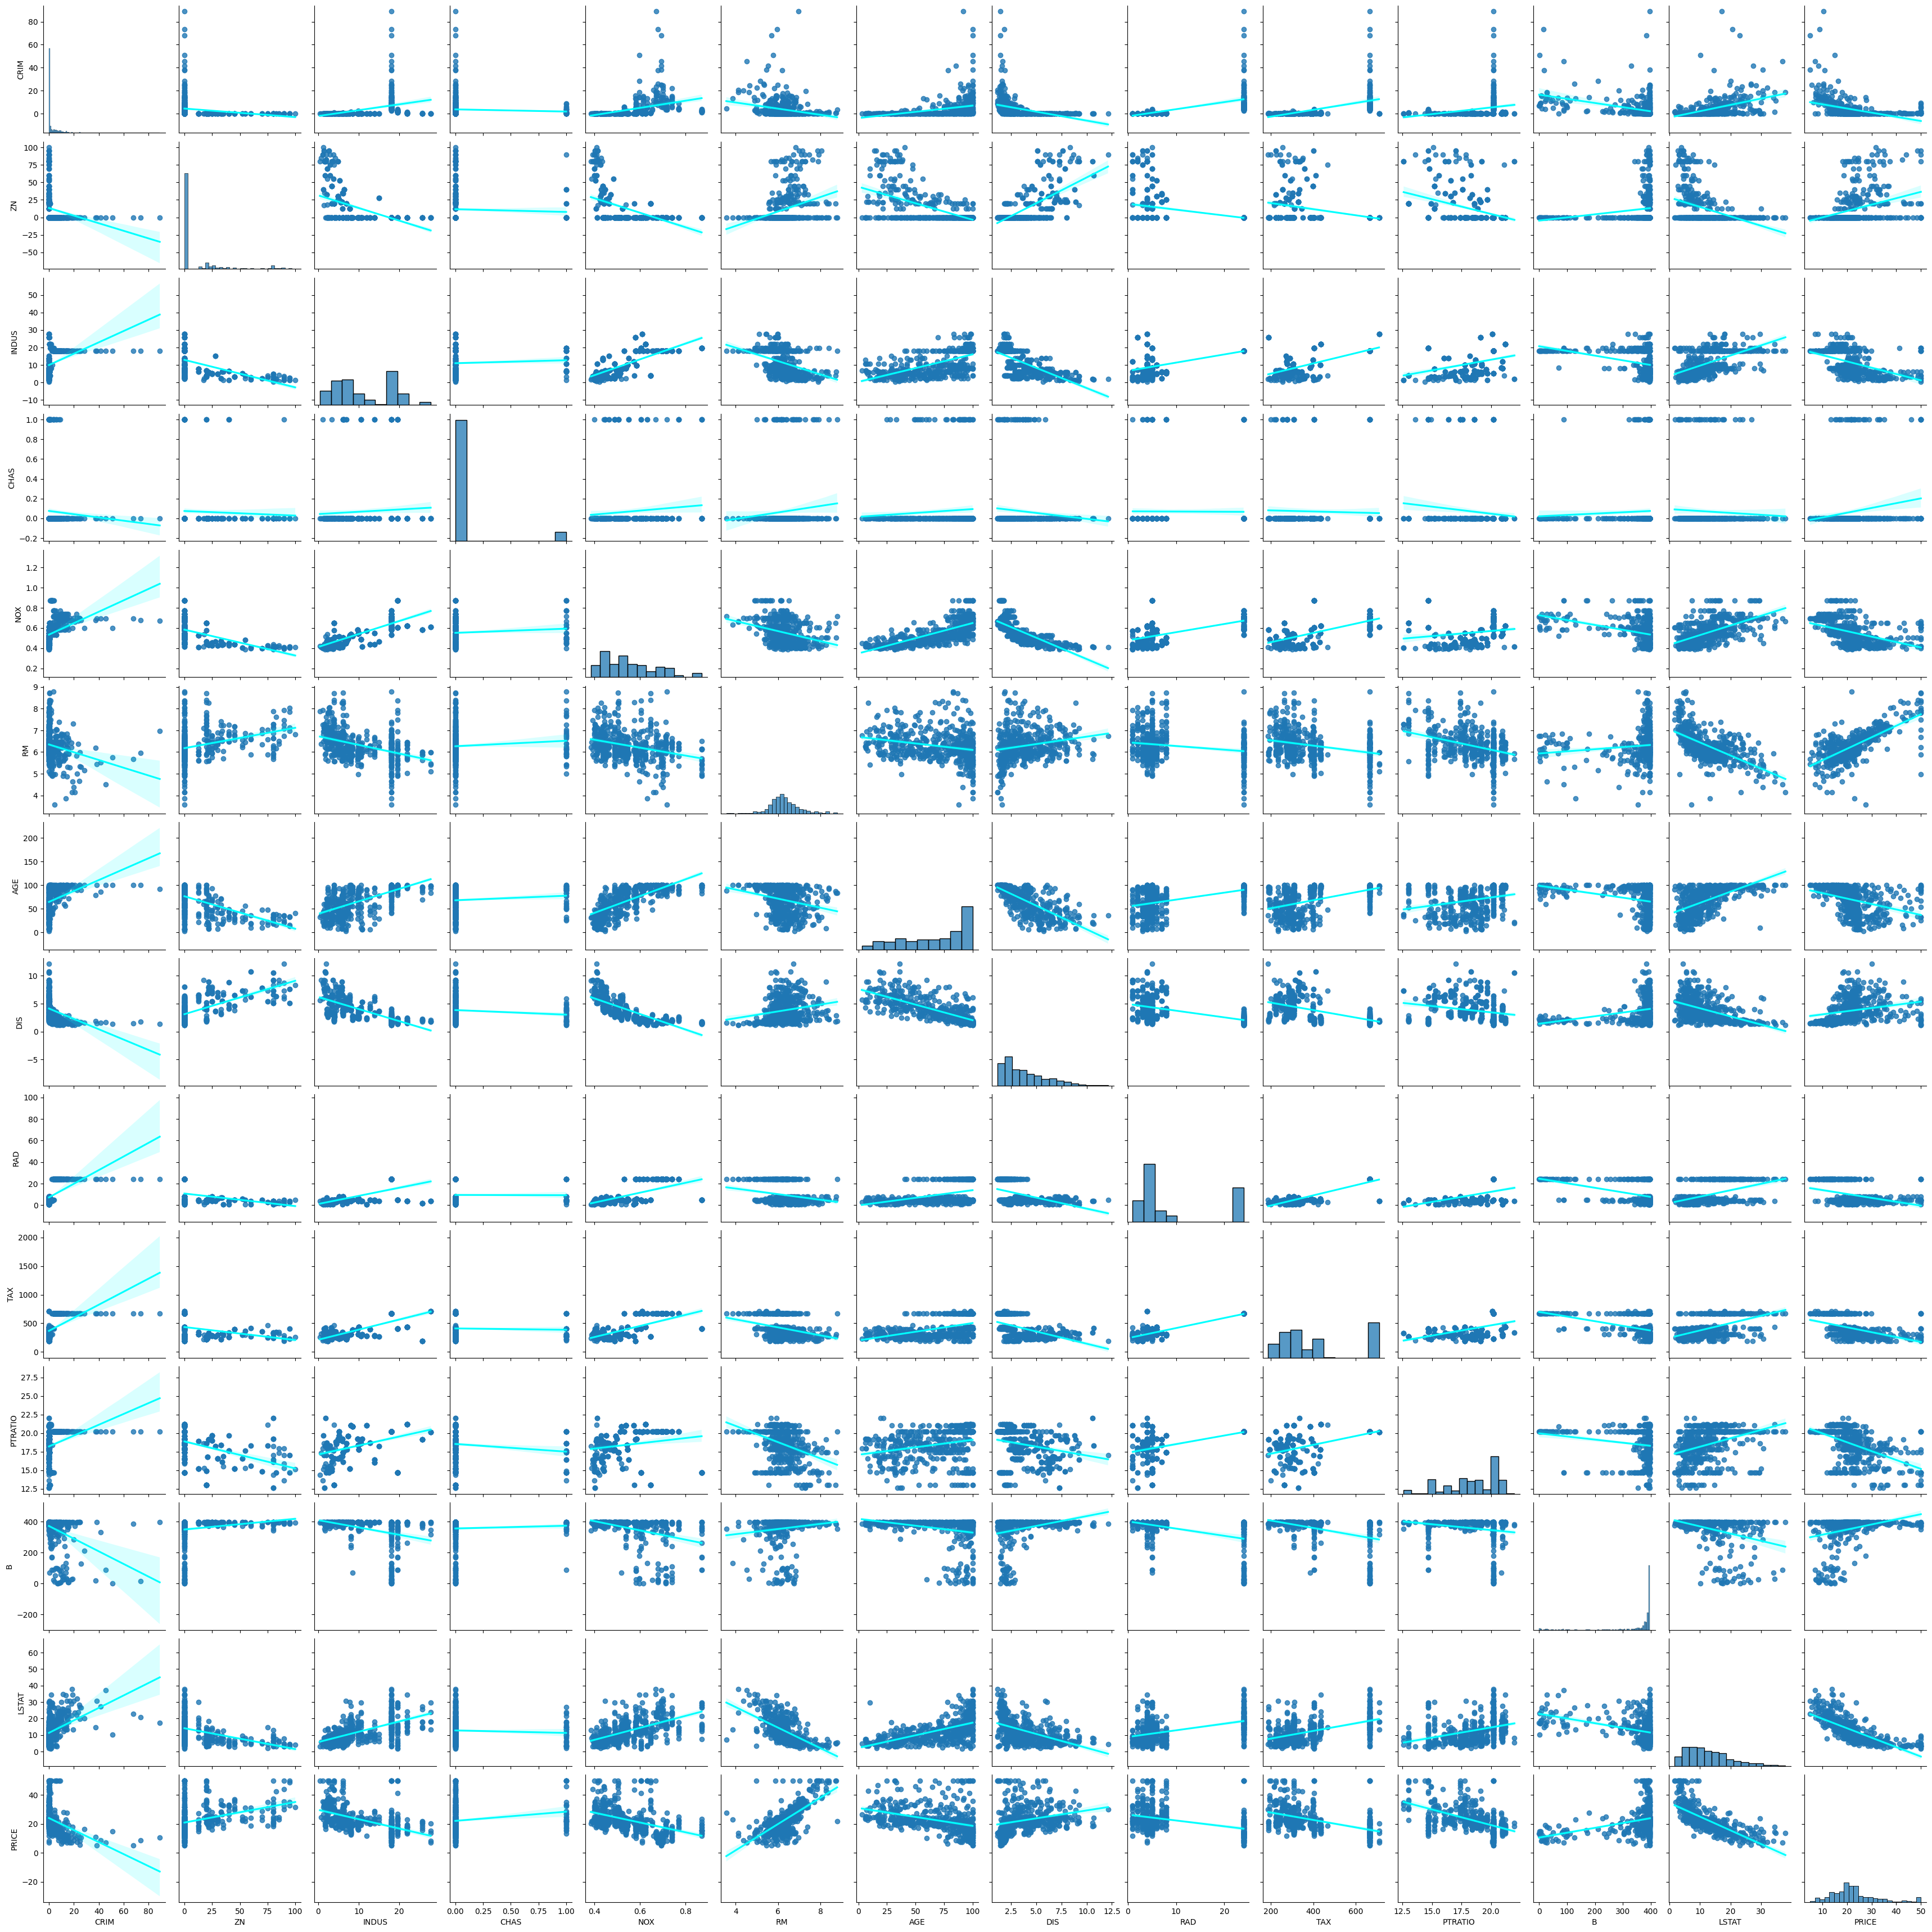

In [114]:
# Relationships between the features in the dataset
sns.pairplot(
    dataset, 
    kind='reg', 
    plot_kws={'line_kws':{'color': 'cyan'}},
)

plt.show()

A few noticeable correlations:
- Homes with more rooms (RM) have higher prices
- With a decreasing percentage in lower status individuals in population (LSTAT), the price of the homes increase
- Crime rate seems to increase with increase in percentage of lower status (LSTAT)
- Properties farther away from employment (DIS) have more pollution (NOX)
- New houses (AGE) are farther away from employment (DIS) on an average than older houses
- Presence of more industries (INDUS) creates higher pollution (NOX)

In [145]:
!pip install statsmodels

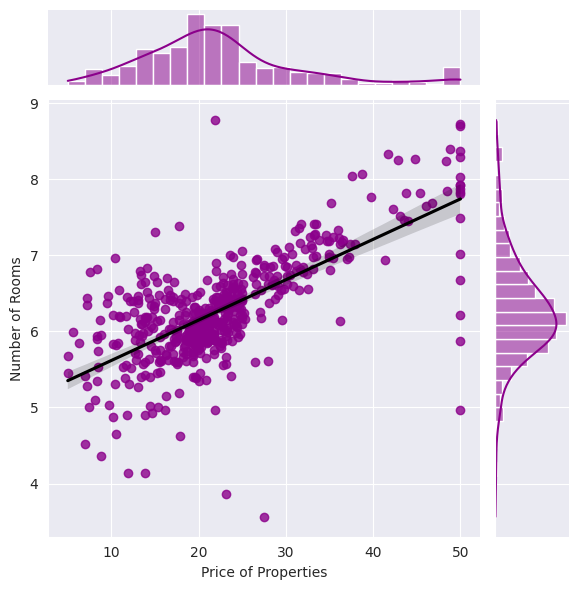

In [158]:
# Relationship between RM and PRICE
with sns.axes_style('darkgrid'):
    sns.jointplot(
        dataset,
        x='PRICE',
        y='RM',
        kind='reg',
        joint_kws={'line_kws': {'color': 'black'}},
        color='darkmagenta',
    )

plt.xlabel('Price of Properties')
plt.ylabel('Number of Rooms')

plt.show()

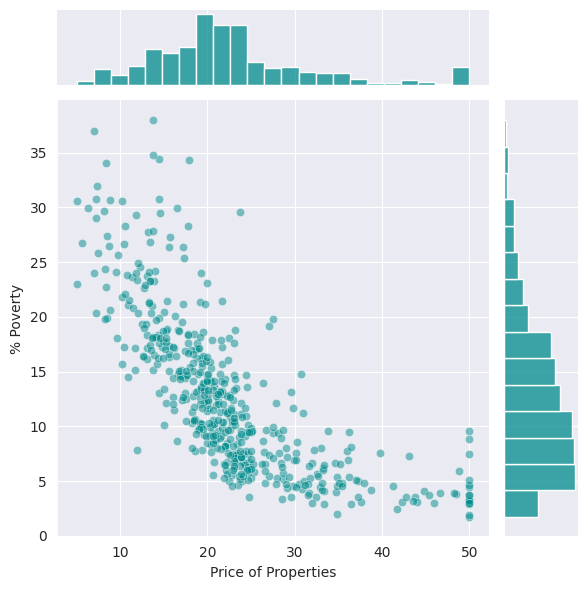

In [156]:
# Relationship between LSTAT and PRICE
with sns.axes_style('darkgrid'):
    sns.jointplot(
        dataset,
        x='PRICE',
        y='LSTAT',
        joint_kws={'alpha': 0.5},
        color='darkcyan',
    )

plt.xlabel('Price of Properties')
plt.ylabel('% Poverty')

plt.show()

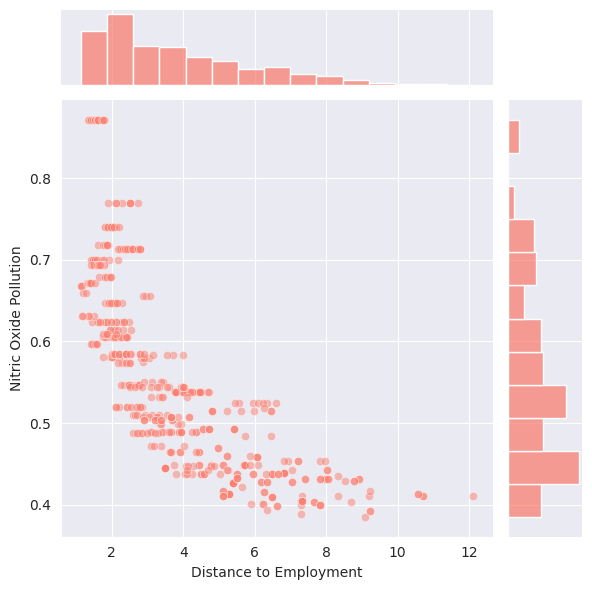

In [153]:
# Relationship between DIS and NOX
with sns.axes_style('darkgrid'):
    sns.jointplot(
        dataset,
        x='DIS',
        y='NOX',
        # kind='reg',
        joint_kws={'alpha': 0.5},
        color='salmon',
    )

plt.xlabel('Distance to Employment')
plt.ylabel('Nitric Oxide Pollution')

plt.show()

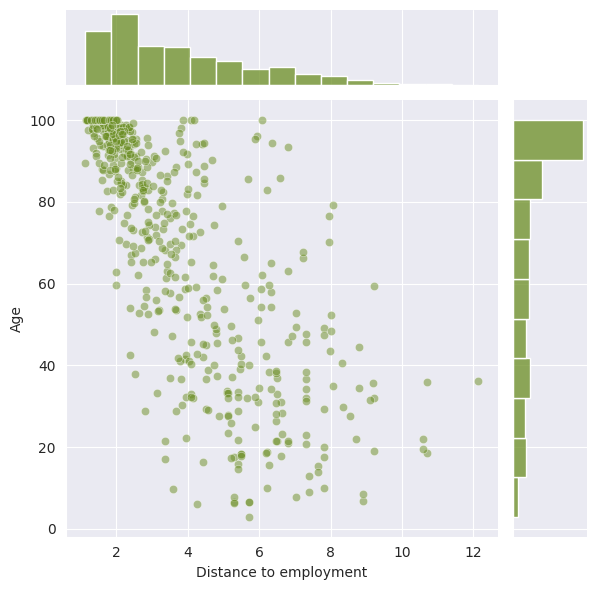

In [168]:
# Relationship between AGE and DIS
with sns.axes_style('darkgrid'):
    sns.jointplot(
        dataset,
        x='DIS',
        y='AGE',
        # kind='reg',
        # joint_kws={'line_kws': {'color': 'black'}},
        joint_kws={'alpha': 0.5},
        color='olivedrab',
    )

plt.xlabel('Distance to employment')
plt.ylabel('Age')

plt.show()

## Splitting Dataset Into Training and Test Sets

In [172]:
# Matrix of features
X = dataset.iloc[:, :-1].values

# Dependent variable (PRICE)
y = dataset.iloc[:, -1].values

In [175]:
# Splitting training and testing with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Regression Model Creation and Evaluation

### Training the Linear Regression Model

In [176]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Evaluating the R-Squared Score of the Model

In [182]:
r2 = r2_score(y_train, regressor.predict(X_train))
print('R-squared (training data): {:.2}'.format(r2))

R-squared (training data): 0.75


### Evaluating the coefficients of the model

In [186]:
reg_coef_df = pd.DataFrame(index=dataset.drop('PRICE', axis=1).columns, data=regressor.coef_, columns=['coefficients'])
reg_coef_df

,coefficients
CRIM,-0.11
ZN,0.03
INDUS,0.04
CHAS,2.78
NOX,-17.20
RM,4.44
AGE,-0.01
DIS,-1.45
RAD,0.26
TAX,-0.01
